## Stepik ML contest

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize':(9,6)})

In [4]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')

In [5]:
events_data.shape

(3480703, 4)

In [6]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
events_data['data'] = pd.to_datetime(events_data.timestamp, unit='s')

In [8]:
events_data

,step_id,timestamp,action,user_id,data
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [9]:
events_data.data.min()

Timestamp('2015-06-15 04:00:48')

In [10]:
events_data['day']=events_data.data.dt.date

In [11]:
events_data.head()

,step_id,timestamp,action,user_id,data,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


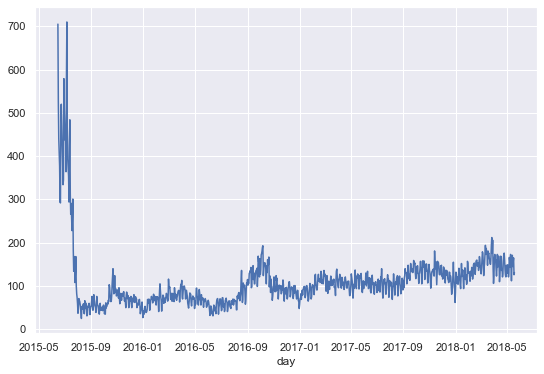

In [12]:
events_data.groupby('day')\
    .user_id.nunique().plot()

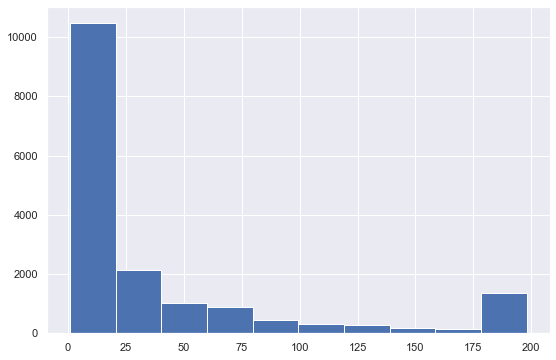

In [13]:
events_data[events_data.action == 'passed']\
    .groupby('user_id', as_index=False)\
    .agg({'step_id': 'count'}).rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

In [14]:
events_data[events_data.action == 'passed']\
    .groupby('user_id', as_index=False)\
    .agg({'step_id': 'count'}).rename(columns={'step_id':'passed_steps'}).passed_steps.min()

1

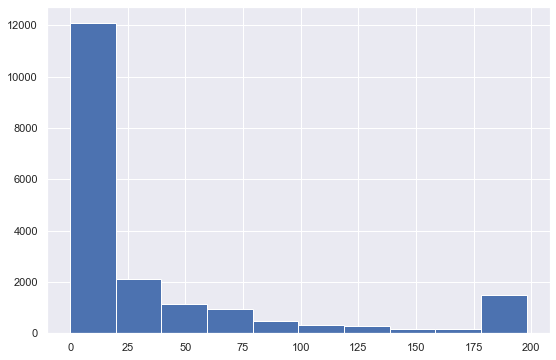

In [15]:
events_data.pivot_table(index='user_id', columns='action', \
                        values='step_id', aggfunc='count', fill_value=0)\
                        .reset_index().discovered.hist()

In [16]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')

Anatoly Karpovich

In [98]:
submissions_data[submissions_data.step_id == 120745].sort_values(by='date').head(10)

,step_id,timestamp,submission_status,user_id,date,day
197138,120745,1471447725,correct,3504,2016-08-17 15:28:45,2016-08-17
144660,120745,1471448447,correct,13770,2016-08-17 15:40:47,2016-08-17
197587,120745,1471450516,wrong,4182,2016-08-17 16:15:16,2016-08-17
197588,120745,1471450526,correct,4182,2016-08-17 16:15:26,2016-08-17
187746,120745,1471456454,correct,9537,2016-08-17 17:54:14,2016-08-17
145431,120745,1471461536,correct,16081,2016-08-17 19:18:56,2016-08-17
162483,120745,1471462112,wrong,2253,2016-08-17 19:28:32,2016-08-17
162484,120745,1471462123,correct,2253,2016-08-17 19:28:43,2016-08-17
195224,120745,1471462314,correct,13284,2016-08-17 19:31:54,2016-08-17
198757,120745,1471462350,correct,20436,2016-08-17 19:32:30,2016-08-17


In [102]:
submissions_data.groupby('submission_status').agg('count').head()

,step_id,timestamp,user_id,date,day
submission_status,,,,,
correct,222705,222705,222705,222705,222705
wrong,286399,286399,286399,286399,286399


In [39]:
submissions_data['date']=pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day']=submissions_data.date.dt.date

In [44]:
users_score = submissions_data.pivot_table(index='user_id',
                             columns='submission_status',
                             values='step_id',
                             aggfunc='count',
                             fill_value=0).reset_index()

In [57]:
gap_data = events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id', 'day'])\
        .groupby('user_id')['timestamp'].apply(list)\
        .apply(np.diff).values

In [58]:
gap_data=pd.Series(np.concatenate(gap_data, axis=0))

In [61]:

gap_data = gap_data / (24*60*60)

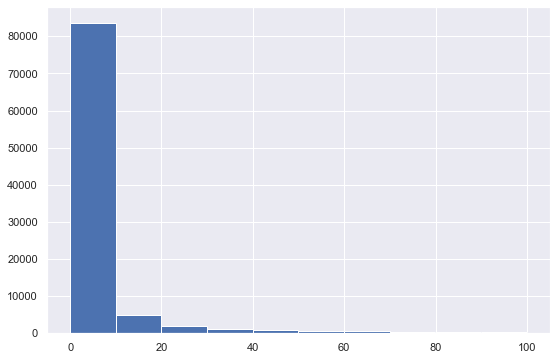

In [65]:
gap_data[gap_data<100].hist()


In [67]:
gap_data.quantile(q=0.9)

18.325995370370403

In [109]:
users_score = submissions_data.pivot_table(index='user_id',
                             columns='submission_status',
                             values='step_id',
                             aggfunc='count',
                             fill_value=0).reset_index().sort_values(by='correct', ascending=False).head()

# Second week

In [19]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')
submission_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data['day'] = events_data.date.dt.date

submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit = 's')
submission_data['day'] = submission_data.date.dt.date

users_data = events_data.groupby('user_id', as_index= False)\
        .agg({'timestamp': 'max'})\
        .rename({'timestamp':'last_timestamp'}, axis = 'columns')
now = 1526772811
drop_out_threasold = 2592000

users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threasold
users_scores = submission_data.pivot_table(index='user_id',\
                        columns = 'submission_status',\
                        values = 'step_id',\
                        aggfunc = 'count',\
                        fill_value = 0)\
                        .reset_index()
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')
users_data = users_data.fillna(0)
users_invent_data = events_data.pivot_table(index = 'user_id',
                        columns = 'action',
                        values  = 'step_id',
                        aggfunc = 'count',
                        fill_value = 0).reset_index()
users_data = users_data.merge(users_invent_data, how = 'outer')
users_days = events_data.groupby('user_id').day.nunique()
users_days.to_frame().reset_index()
users_data = users_data.merge(users_days, on = 'user_id', how = 'outer')
users_data['passed_corse'] = users_data.passed > 170

In [20]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


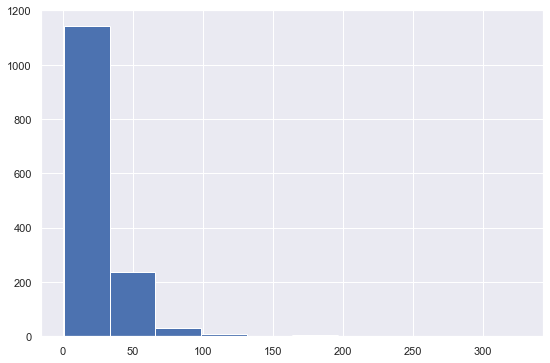

In [22]:
users_data[users_data.passed_corse].day.hist()

In [28]:
user_min_time = events_data.groupby('user_id', as_index=False).agg({'timestamp': 'min'})\
                .rename({'timestamp':'mini_timestamp'}, axis=1)

In [30]:
users_data = users_data.merge(user_min_time, how = 'outer')

In [33]:
events_data_train = pd.DataFrame()

In [36]:
events_data['user_time'] = events_data.timestamp.map(str) + '_' + events_data.user_id.map(str)

In [37]:
events_data

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848_17632
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848_17632
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848_17632
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340895_17632
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340895_17632
...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,1526772685_11677
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1526772750_5198
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1526772750_5198
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,1526772750_5198


In [38]:
learning_time_treshold = 3*24*60*60

In [40]:
user_learning_time_treshold = user_min_time.user_id.map(str) + '_'\
                                +(user_min_time.mini_timestamp + learning_time_treshold).map(str)

In [41]:
user_learning_time_treshold

0            1_1473086664
1            2_1514642564
2            3_1434617676
3            5_1466416009
4            7_1521893860
               ...       
19229    26790_1451743216
19230    26793_1510484231
19231    26794_1495546249
19232    26797_1508684516
19233    26798_1521234963
Length: 19234, dtype: object

In [42]:
user_min_time['user_learning_time_treshold']=user_learning_time_treshold

In [44]:
events_data = events_data.merge(user_min_time[['user_id','user_learning_time_treshold']], how='outer')

In [45]:
events_data.shape

(3480703, 8)

In [90]:
%%time
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_treshold]


CPU times: user 740 ms, sys: 888 ms, total: 1.63 s
Wall time: 1.93 s


### Task 2 *hate*

In [54]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [75]:
submissions = pd.get_dummies(submissions_data, columns=['submission_status'])

In [87]:
submissions_data[submissions_data.submission_status == 'wrong'].step_id.value_counts()

31978    16084
32031    13373
32202    13002
33481    10300
32075    10003
         ...  
33482      707
33681      703
33362      673
32175      342
32929       85
Name: step_id, Length: 76, dtype: int64

In [66]:
submissions = submissions_data
#submissions = submissions.drop(columns=['date', 'day'])
submissions = pd.get_dummies(submissions, columns=['submission_status'])

last_time = submissions.groupby('user_id').agg({ 'timestamp': 'max' })
last_time = last_time.rename(columns={ 'timestamp': 'last_timestamp' })

last_step_id = submissions.groupby('user_id').agg({ 'step_id': 'max' })
last_step_id = last_step_id.rename(columns={ 'step_id': 'last_step_id' })

submissions = submissions.merge(last_time, on='user_id')
submissions = submissions.merge(last_step_id, on='user_id')

In [91]:
events_data_train.groupby('user_id').day.nunique().max()

327